### Imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

### EDA

In [104]:
df=pd.read_csv("../data/Airbnb_data.csv")

In [105]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [106]:
df.shape

(74111, 29)

In [107]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [108]:
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [109]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


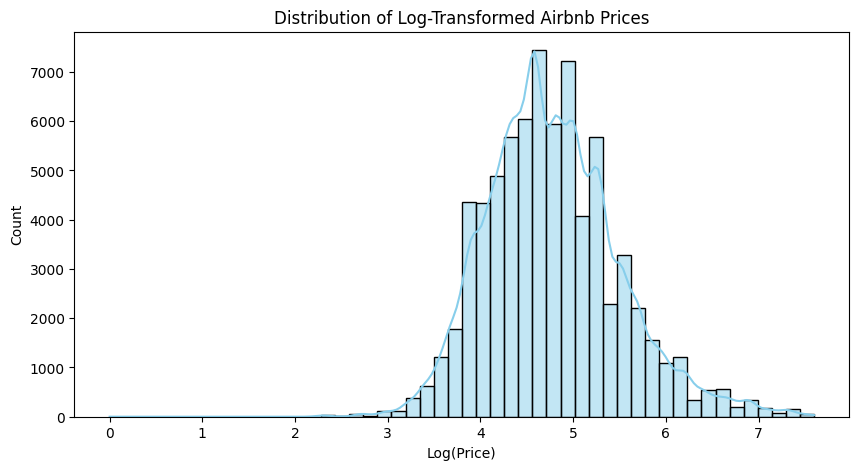

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['log_price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Log-Transformed Airbnb Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()

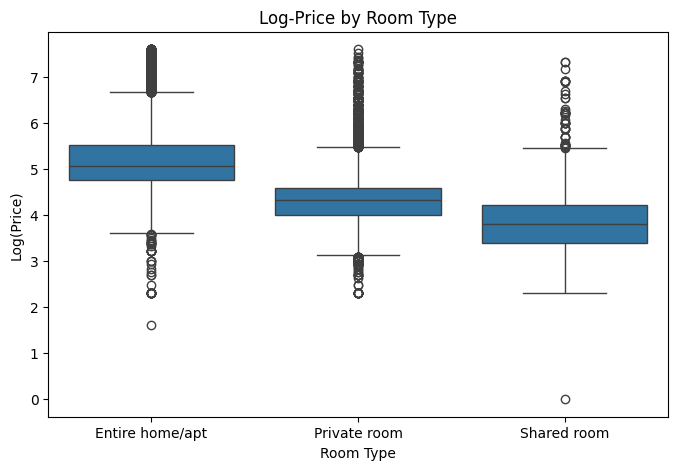

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title("Log-Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Log(Price)")
plt.show()

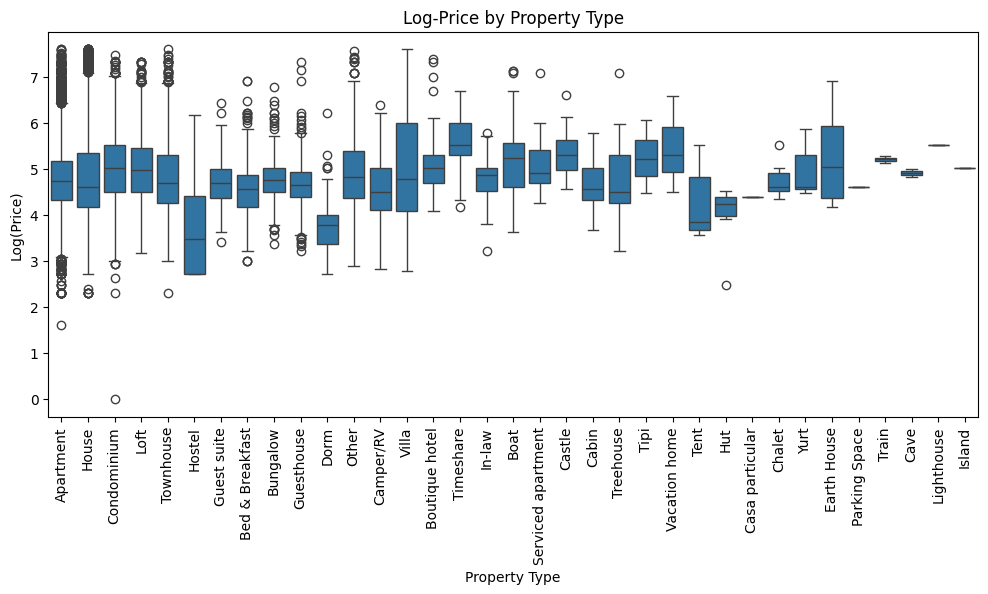

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='property_type', y='log_price', data=df)
plt.xticks(rotation=45)
plt.title("Log-Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Log(Price)")
plt.xticks(rotation=90)  
plt.show()


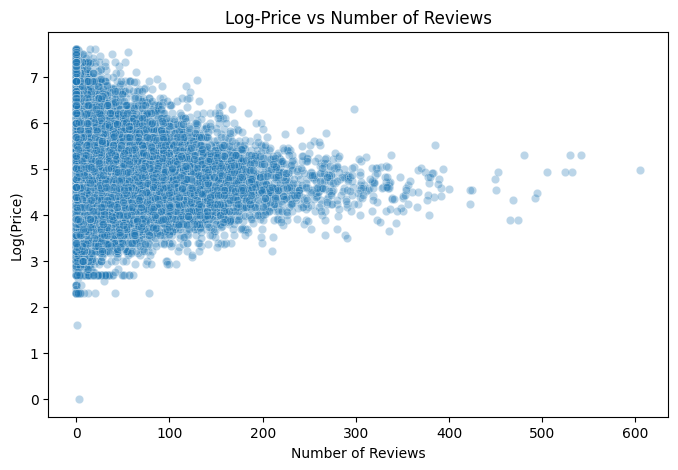

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='log_price', data=df, alpha=0.3)
plt.title("Log-Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Log(Price)")
plt.show()

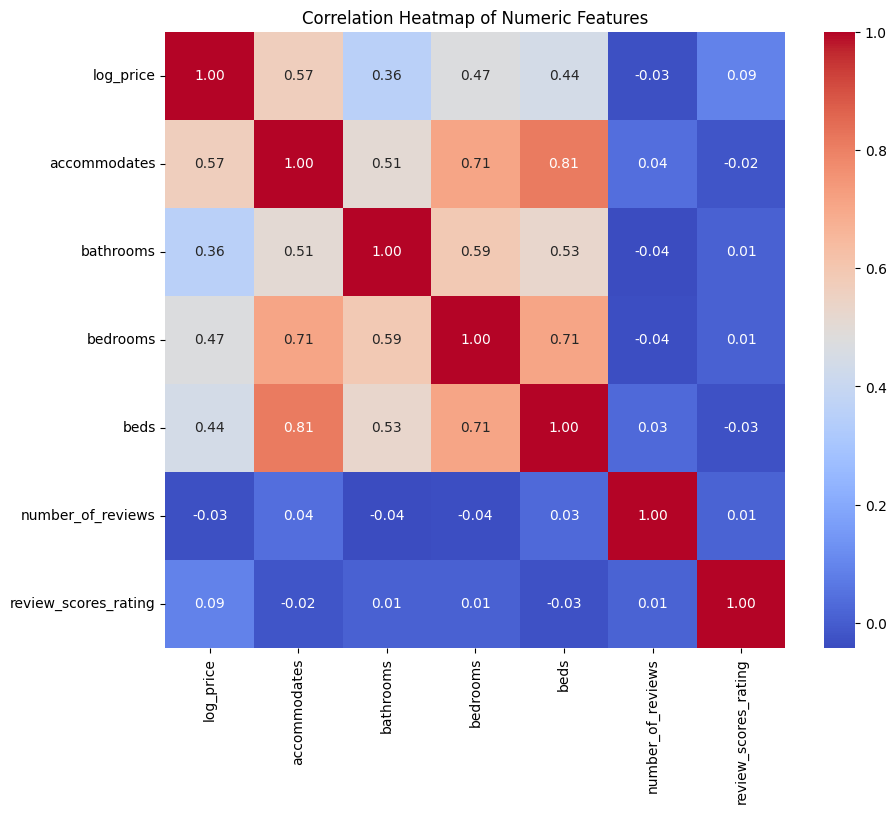

In [ ]:
numeric_cols = ['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                'number_of_reviews', 'review_scores_rating']

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

C:\Users\arpit\AppData\Local\Temp\ipykernel_6968\1323605738.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='log_price', data=df, ci=None, palette='viridis')
C:\Users\arpit\AppData\Local\Temp\ipykernel_6968\1323605738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='log_price', data=df, ci=None, palette='viridis')


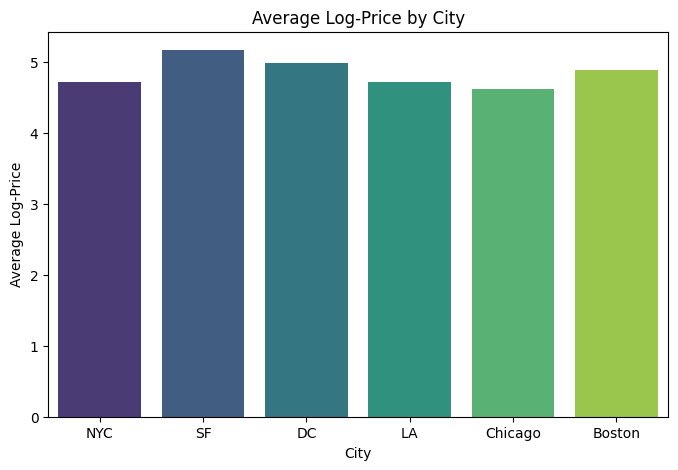

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='city', y='log_price', data=df, ci=None, palette='viridis')
plt.title("Average Log-Price by City")
plt.xlabel("City")
plt.ylabel("Average Log-Price")
plt.show()

### Data Preprocessing

In [57]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

#### Drop cols

In [58]:
cols=['id', 'name', 'thumbnail_url', 'longitude', 'latitude']
df.drop(columns=cols, inplace=True)

#### Handle Missing Values

In [60]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

df['first_review'] = df['first_review'].fillna('missing')
df['last_review'] = df['last_review'].fillna('missing')
df['host_since'] = df['host_since'].fillna('missing')

df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna('f')
df['host_identity_verified'] = df['host_identity_verified'].fillna('f')

df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

df['neighbourhood'] = df['neighbourhood'].fillna('missing')
df['zipcode'] = df['zipcode'].fillna('missing')

In [61]:
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

#### Count Amenities col

In [62]:
df['num_amenities'] = df['amenities'].apply(lambda x: len(x.split(',')))
df.drop(columns='amenities', inplace=True)

#### Convert boolean columns

In [63]:
df['cleaning_fee'] = df['cleaning_fee'].astype(int)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})

#### Convert date columns

In [64]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['days_since_first_review'] = (pd.to_datetime('today') - df['first_review']).dt.days
df['days_since_first_review'] = df['days_since_first_review'].fillna(0)

df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_days'] = (pd.to_datetime('today') - df['host_since']).dt.days
df['host_days'] = df['host_days'].fillna(df['host_days'].median())

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['days_since_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days
df['days_since_last_review'] = df['days_since_last_review'].fillna(0)

In [65]:
cols=['first_review','host_since', 'last_review']
df.drop(columns=cols, inplace=True)

In [66]:
first_row_series = df.iloc[0]
print(first_row_series)

log_price                                                           5.010635
property_type                                                      Apartment
room_type                                                    Entire home/apt
accommodates                                                               3
bathrooms                                                                1.0
bed_type                                                            Real Bed
cancellation_policy                                                   strict
cleaning_fee                                                               1
city                                                                     NYC
description                Beautiful, sunlit brownstone 1-bedroom in the ...
host_has_profile_pic                                                       1
host_identity_verified                                                     1
host_response_rate                                                     100.0

#### One hot encoding

In [67]:
print(df['property_type'].unique())
print(df['room_type'].unique())
print(df['bed_type'].unique())
print(df['cancellation_policy'].unique())
print(df['city'].unique())

['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']
['Entire home/apt' 'Private room' 'Shared room']
['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed']
['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']
['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston']


In [68]:
categorical_cols = ['room_type', 'bed_type', 'cancellation_policy', 'city']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [69]:
print(df['property_type'].value_counts().head(10))

property_type
Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other                607
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Name: count, dtype: int64


In [70]:
top_types = ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft']
df['property_type_simplified'] = df['property_type'].apply(lambda x: x if x in top_types else "Other")
df = pd.get_dummies(df, columns=['property_type_simplified'], drop_first=True)
df.drop(columns='property_type', inplace=True)

In [71]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

##### Freq encode

In [72]:
neigh_freq = df['neighbourhood'].value_counts(normalize=True)
df['neighbourhood_freq'] = df['neighbourhood'].map(neigh_freq)
df = df.drop(columns=['neighbourhood'])

zip_freq = df['zipcode'].value_counts(normalize=True)
df['zipcode_freq'] = df['zipcode'].map(zip_freq)
df = df.drop(columns=['zipcode'])


#### Sentiment score of description

In [73]:
sid = SentimentIntensityAnalyzer()
df['description_sentiment'] = df['description'].fillna('').apply(lambda x: sid.polarity_scores(x)['compound'])
df = df.drop(columns=['description'])

In [74]:
print(df.iloc[0])

log_price                                  5.010635
accommodates                               3.000000
bathrooms                                  1.000000
cleaning_fee                               1.000000
host_has_profile_pic                       1.000000
host_identity_verified                     1.000000
host_response_rate                       100.000000
instant_bookable                           0.000000
number_of_reviews                          2.000000
review_scores_rating                     100.000000
bedrooms                                   1.000000
beds                                       1.000000
num_amenities                              9.000000
days_since_first_review                 3365.000000
host_days                               4910.000000
days_since_last_review                  3335.000000
room_type_Private room                     0.000000
room_type_Shared room                      0.000000
bed_type_Couch                             0.000000
bed_type_Fut

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   log_price                             74111 non-null  float64
 1   accommodates                          74111 non-null  int64  
 2   bathrooms                             74111 non-null  float64
 3   cleaning_fee                          74111 non-null  int64  
 4   host_has_profile_pic                  74111 non-null  int64  
 5   host_identity_verified                74111 non-null  int64  
 6   host_response_rate                    74111 non-null  float64
 7   instant_bookable                      74111 non-null  int64  
 8   number_of_reviews                     74111 non-null  int64  
 9   review_scores_rating                  74111 non-null  float64
 10  bedrooms                              74111 non-null  float64
 11  beds           

### Feature Engineering

In [76]:
df['beds_per_guest'] = df['beds'] / df['accommodates']
df['bathrooms_per_guest'] = df['bathrooms'] / df['accommodates']
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)
df['reviews_per_day'] = df['number_of_reviews'] / (df['host_days'] + 1)
df['is_new_host'] = (df['host_days'] < 365).astype(int)
df['is_new_listing'] = (df['days_since_first_review'] < 180).astype(int)

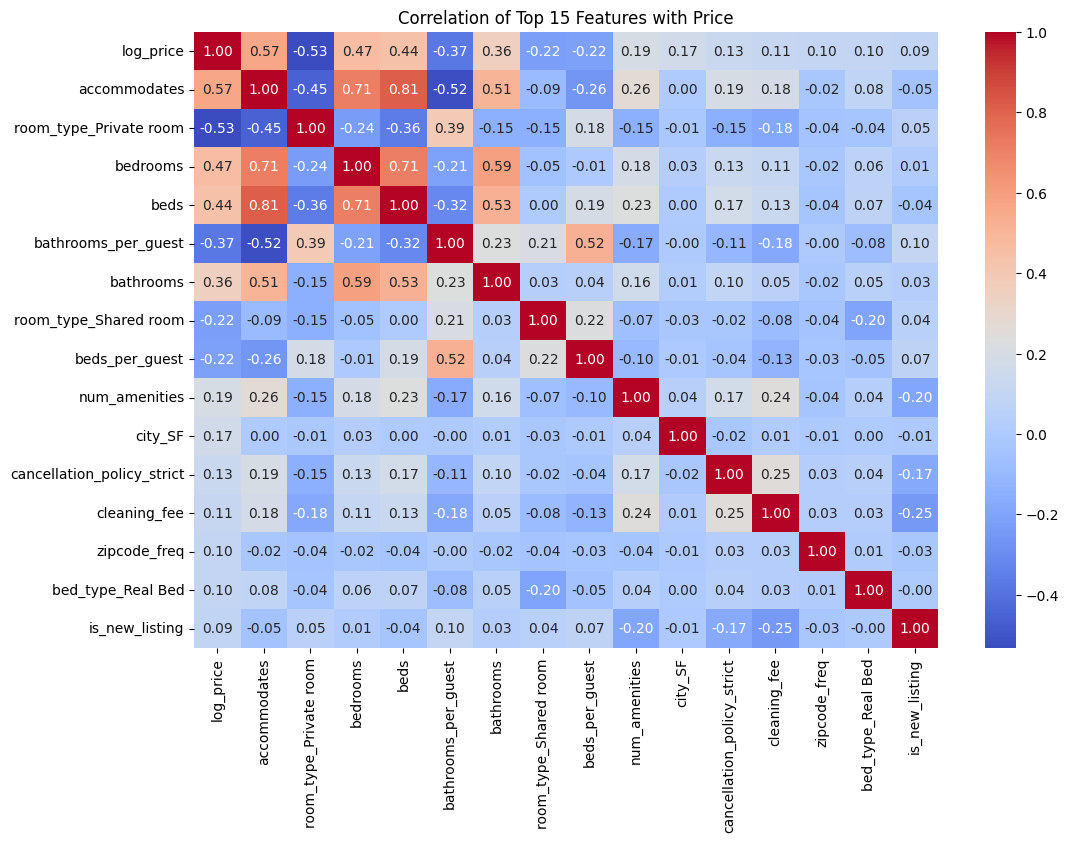

In [78]:
corr_price = df.corr()['log_price'].sort_values(key=abs, ascending=False)
top_features = corr_price.index[1:16] 
top_features = top_features.insert(0, 'log_price')
plt.figure(figsize=(12,8))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of Top 15 Features with Price")
plt.show()


### Linear Regression Model

#### Train test split

In [79]:
X = df.drop(columns=['log_price'])
y = df['log_price']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train model

In [82]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Evaluation

In [121]:
y_pred = lr.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Performance:
RMSE: 0.46
MAE: 0.35
R² Score: 0.5834


### Random Forest Regressor


#### Train model

In [93]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

In [94]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### Evaluation

In [95]:

rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [120]:
print("Random Forest Performance:")

print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Performance:
RMSE: 0.41
MAE: 0.30
R² Score: 0.6666


### XGBoost

#### Model Training

In [97]:
xgbr = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [98]:
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

#### Evaluation

In [99]:
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [122]:
print("\nXGBoost Performance:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")


XGBoost Performance:
RMSE: 0.39
MAE: 0.28
R² Score: 0.7098


### Visualization

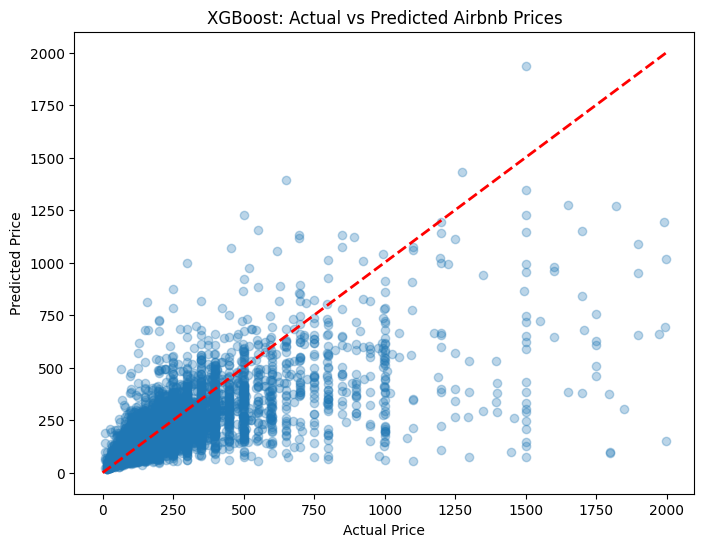

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.3)
plt.plot([0, np.exp(y_test).max()], [0, np.exp(y_test).max()], 'r--', lw=2)  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted Airbnb Prices")
plt.show()



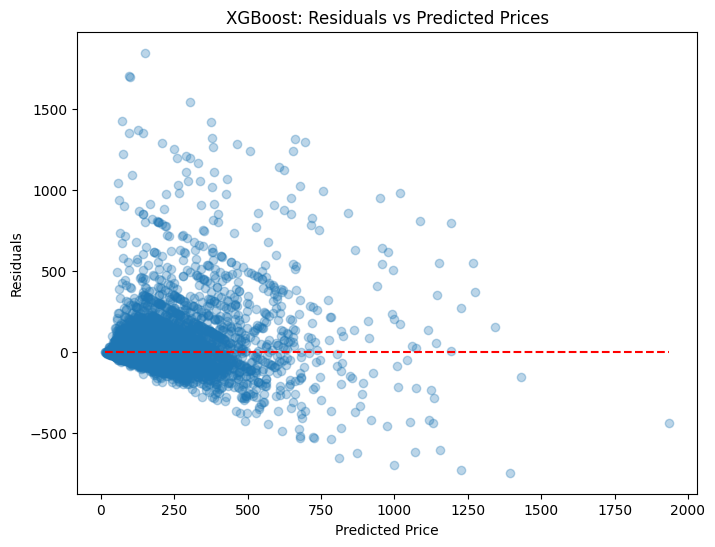

In [124]:
residuals = np.exp(y_test) - np.exp(y_pred_xgb)
plt.figure(figsize=(8,6))
plt.scatter(np.exp(y_pred_xgb), residuals, alpha=0.3)
plt.hlines(0, xmin=np.exp(y_pred_xgb).min(), xmax=np.exp(y_pred_xgb).max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("XGBoost: Residuals vs Predicted Prices")
plt.show()



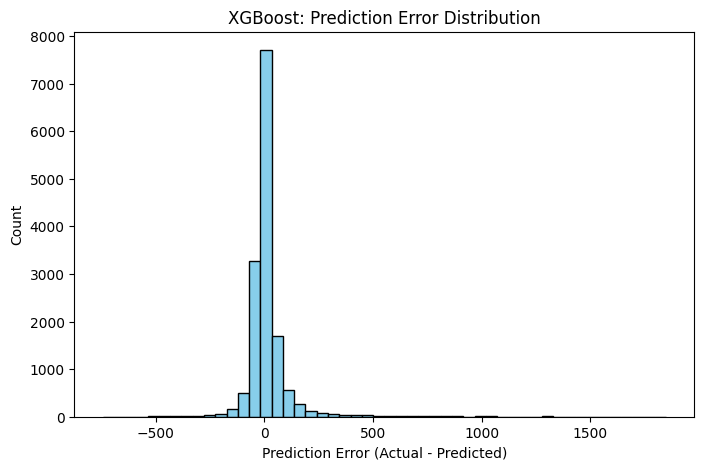

In [125]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Count")
plt.title("XGBoost: Prediction Error Distribution")
plt.show()


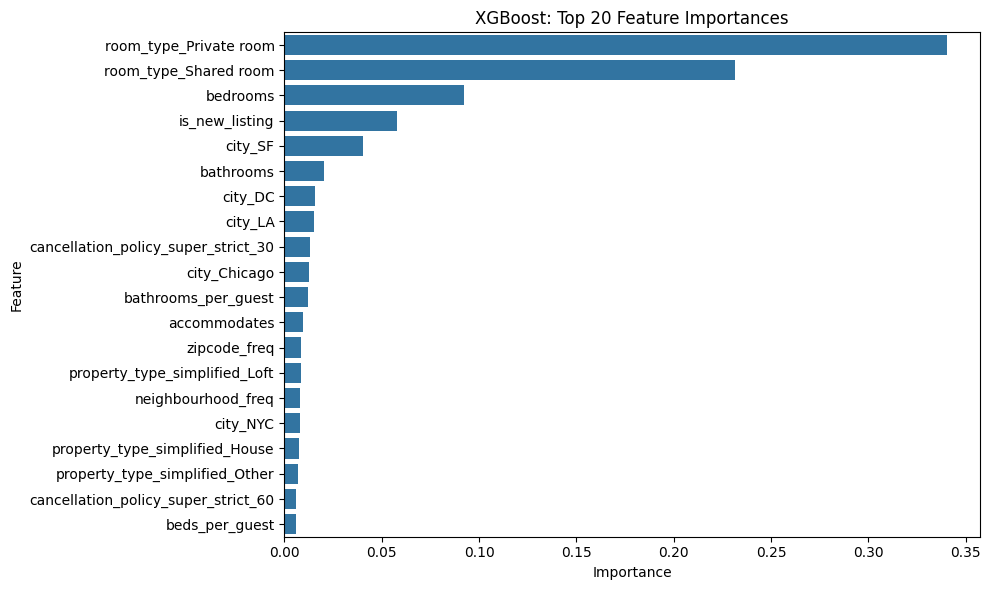

In [130]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgbr.feature_importances_
}).sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("XGBoost: Top 20 Feature Importances")
plt.tight_layout()
plt.show()

